# Getting and preprocessing faces data

* https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data
* https://www.kaggle.com/datasets/msambare/fer2013
* https://blog.devgenius.io/facial-expression-recognition-with-tensorflow-90f6174163c3
  * https://github.com/joaopdss/FacialExpressionRecognition/blob/main/Facial_expression_recognition%20.ipynb

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

In [2]:
import numpy as np
np.__version__

'1.22.3'

In [3]:
import pandas as pd

In [4]:
FER2013_CSV_PATH = "/home/olli/cv/fer2013/fer2013.csv"

In [5]:
label_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [6]:
filtered_label_names = ["Angry", "Happy", "Sad", "Surprise", "Neutral"]

In [7]:
df = pd.read_csv(FER2013_CSV_PATH)
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
df["emotion"].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [9]:
def plot_data(data, classes):
  
  values = data["emotion"].value_counts().sort_index(ascending=True)

  plt.bar(x=classes, height=values, edgecolor='black')

  plt.xlabel("Emotions")
  plt.ylabel("Amount")
  plt.title("Amount of emotions")
  plt.show();

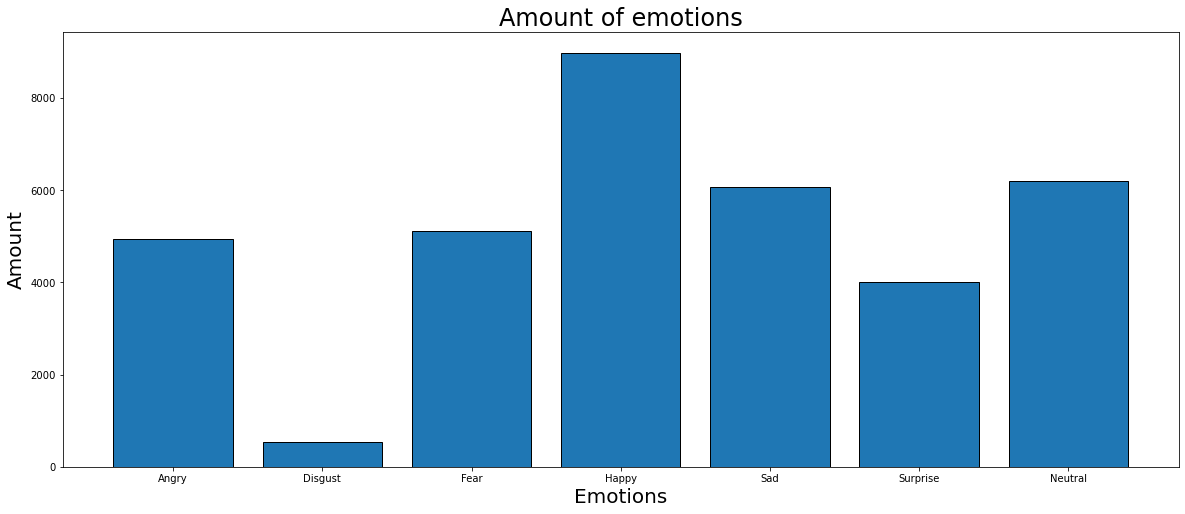

In [10]:
plot_data(df, label_names)

taking advice from 

https://github.com/joaopdss/FacialExpressionRecognition/blob/main/Facial_expression_recognition%20.ipynb

we leave out fear and disgust because they are hard to produce, plus disgust has few samples only

In [11]:
df["emotion"]

0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64

In [12]:
filtered_df = df[df["emotion"].isin([0, 3, 4, 5, 6, 7])] 
filtered_df["emotion"]

0        0
1        0
3        4
4        6
6        4
        ..
35881    0
35882    6
35883    3
35884    0
35885    3
Name: emotion, Length: 30219, dtype: int64

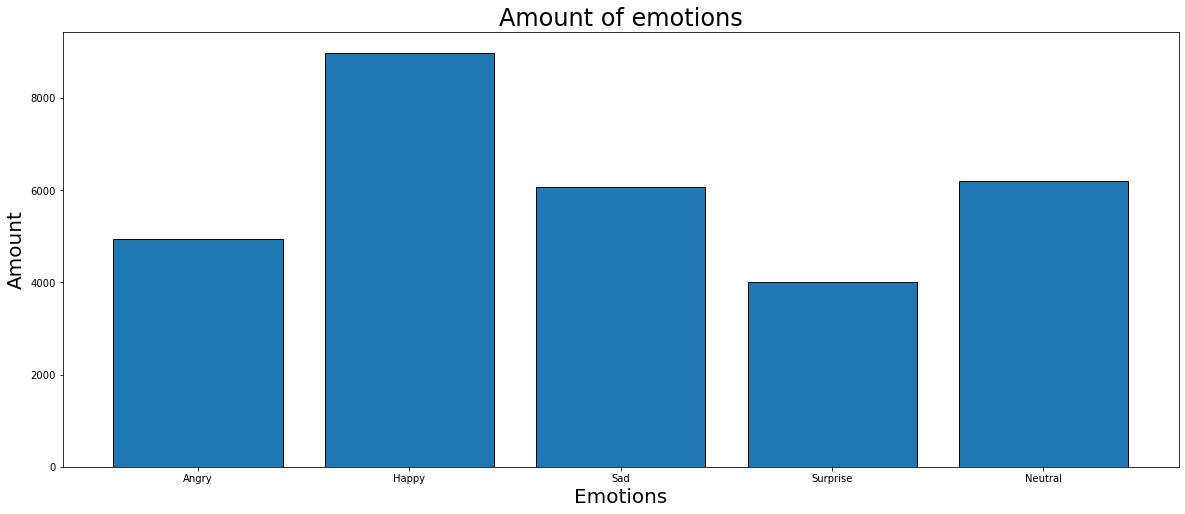

In [13]:
plot_data(filtered_df, filtered_label_names)

In [14]:
df = filtered_df

In [15]:
pixels = df["pixels"]
len(pixels)

30219

In [16]:
resolution = (48, 48)
def image_from_pixels(pixels):
    image = np.reshape(np.array(pixels.split(), 'float64'), resolution)
    return image

In [17]:
%%time

images = np.array([image_from_pixels(p) for p in pixels])
images.shape

CPU times: user 6.63 s, sys: 236 ms, total: 6.87 s
Wall time: 6.87 s


(30219, 48, 48)

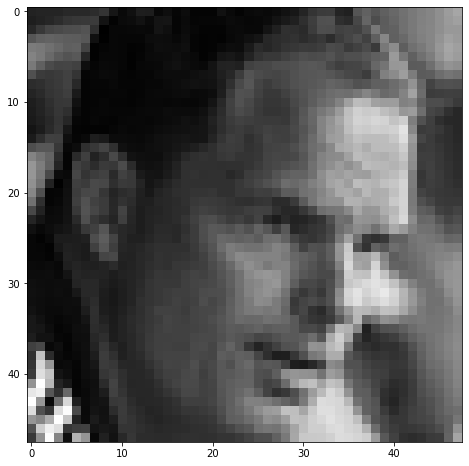

In [18]:
plt.imshow(images[100], cmap='gray');

In [19]:
labels = df["emotion"].values

In [20]:
labels.shape

(30219,)

In [21]:
X = images
y = labels

In [22]:
def plot_gallery(X, y, label_names, size=15):

    population = X.shape[0]
    if size and size < population:
        samples = np.random.choice(population, size=size, replace=False)
    else:
        # just all
        samples = np.arange(0, population)

    for idx, i in enumerate(samples):
        ax = plt.subplot(3, 5, idx + 1)
        image = X[i]
        plt.imshow(image, cmap='gray')
        y_true = y[i]
        plt.title(label_names[y_true])
        plt.axis("off")

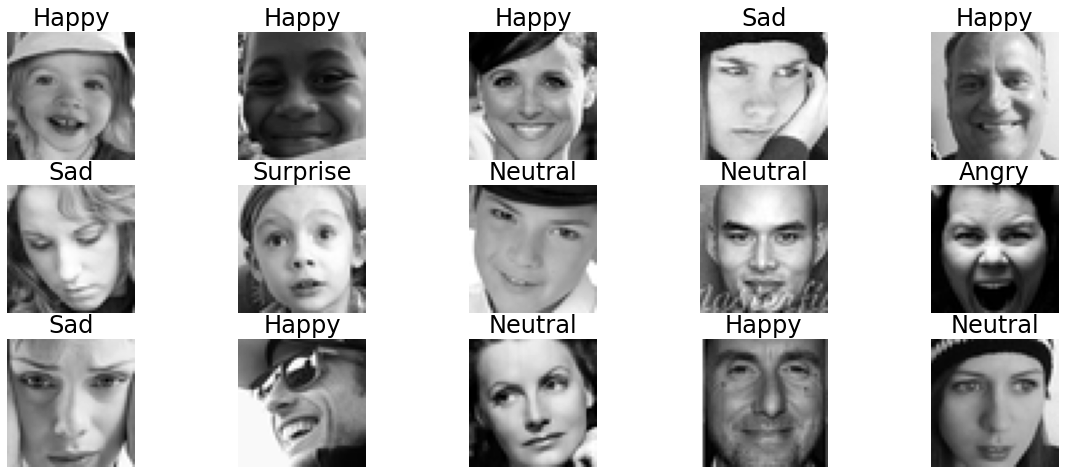

In [25]:
plot_gallery(X, y, label_names)